In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [10]:
df=pd.read_csv('/content/drive/MyDrive/MLL/planes.csv')

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [12]:
df.describe()

,Price
count,10044.000000
mean,9044.411191
std,4472.304869
min,1759.000000
25%,5276.750000
50%,8366.000000
75%,12373.000000
max,54826.000000


In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10655    False
10656    False
10657    False
10658    False
10659    False
Length: 10660, dtype: bool

In [14]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10655,False,False,False,False,False,False,False,False,False,False,False
10656,False,False,False,False,False,False,False,False,False,False,False
10657,False,False,False,False,False,True,False,False,False,True,False
10658,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [17]:
df.shape

(10660, 11)

In [18]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [19]:
df['Price'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        13882.0
1         6218.0
2        13302.0
3         3873.0
4        11087.0
          ...   
10655     4107.0
10656     4145.0
10657     7229.0
10658    12648.0
10659    11753.0
Name: Price, Length: 10660, dtype: float64>

In [20]:
df['Price'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        13882.0
1         6218.0
2        13302.0
3         3873.0
4        11087.0
          ...   
10655     4107.0
10656     4145.0
10657     7229.0
10658    12648.0
10659    11753.0
Name: Price, Length: 10660, dtype: float64>

In [21]:
X = df[df['Dep_Time'].isnull()]
Y = df[df['Duration'].isnull()]

df = df.dropna(subset=['Dep_Time'])
df = df.dropna(subset=['Duration'])

In [32]:
df.isnull()

Airline_counts = df['Airline'].value_counts()
#To get the number of flights of each flights

print(Airline_counts)

Jet Airways          3537
IndiGo               1897
Air India            1611
Multiple carriers    1097
SpiceJet              745
Vistara               438
Air Asia              296
GoAir                 168
Name: Airline, dtype: int64


In [33]:
average_price_by_airline = df.groupby('Airline')['Price'].mean()
print(average_price_by_airline)


Airline
Air Asia              5631.505263
Air India             9557.839974
GoAir                 5831.191358
IndiGo                5704.183445
Jet Airways          11613.547299
Multiple carriers    10885.710808
SpiceJet              4290.920056
Vistara               7821.035885
Name: Price, dtype: float64


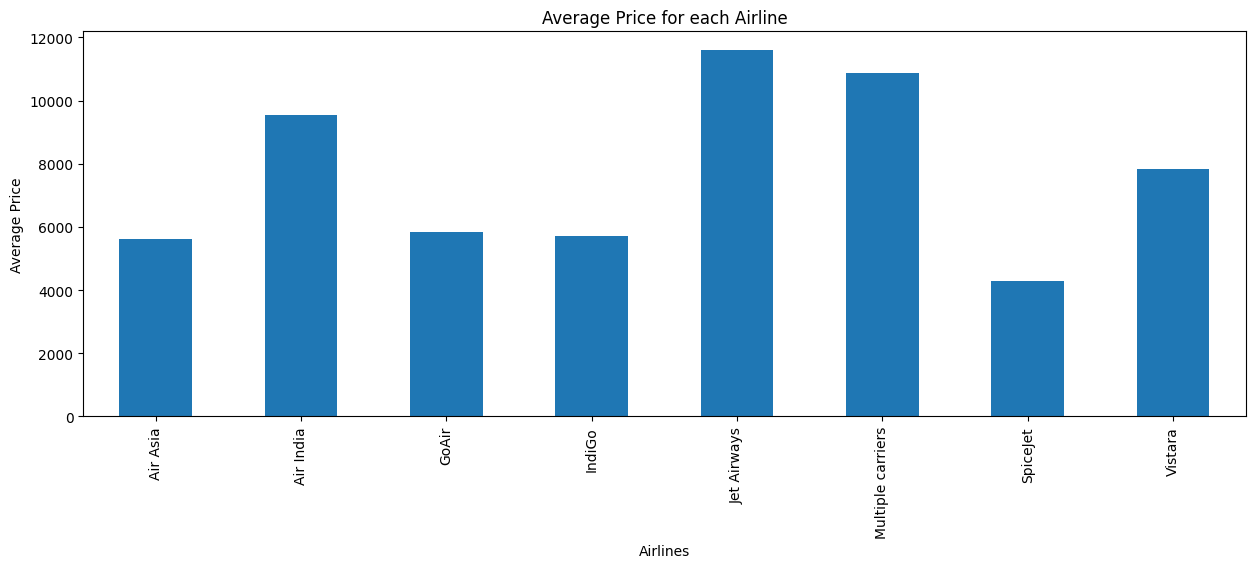

In [34]:
average_price_by_airline.plot(kind='bar', figsize=(15,5))
plt.xlabel('Airlines')
plt.ylabel('Average Price')
plt.title('Average Price for each Airline')
plt.show()